This is my first ipython notebook.

we'll get some imports out of the way. the first line is literally "magic," so no point trying to understand it.



In [1]:
%matplotlib inline
import pbool
import pilp
import psat

First, we will use the FormulaGenerator to cons up an arbitrary formula of depth 5, given an alphabet of literals of cardinality 50.  We seed the PRNG with "9".

F: ((((I45 OR I28) AND (I23 OR I7)) AND (I12 AND I36)) OR ((I46 AND (I19 OR I44)) AND ((I5 AND I19) OR (I13 OR I21))))


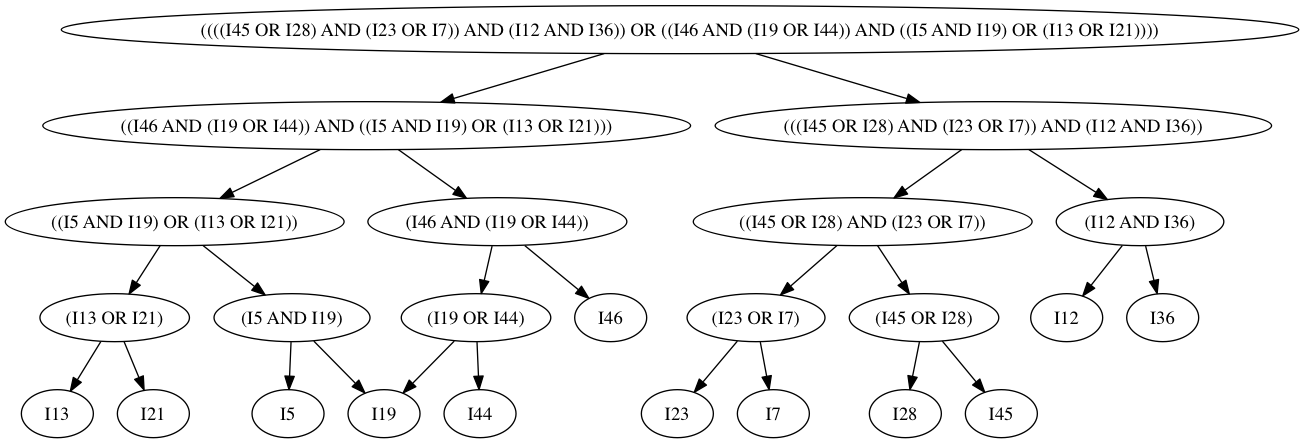

In [5]:
from IPython.display import Image

fg = pbool.FormulaGenerator(50, 9)
f = fg.formula(5)
print "F: " + str(f)

f.graph("foo.gv")
Image(filename='foo.gv.png') 

Convert that dang formula to CNF!

CF: ((((((I45 OR I28) OR I46) AND ((I23 OR I7) OR I46)) AND ((I12 OR I46) AND (I36 OR I46))) AND ((((I45 OR I28) OR (I19 OR I44)) AND ((I23 OR I7) OR (I19 OR I44))) AND ((I12 OR (I19 OR I44)) AND (I36 OR (I19 OR I44))))) AND (((((I45 OR I28) OR (I5 OR (I13 OR I21))) AND ((I23 OR I7) OR (I5 OR (I13 OR I21)))) AND ((I12 OR (I5 OR (I13 OR I21))) AND (I36 OR (I5 OR (I13 OR I21))))) AND ((((I45 OR I28) OR (I19 OR (I13 OR I21))) AND ((I23 OR I7) OR (I19 OR (I13 OR I21)))) AND ((I12 OR (I19 OR (I13 OR I21))) AND (I36 OR (I19 OR (I13 OR I21)))))))


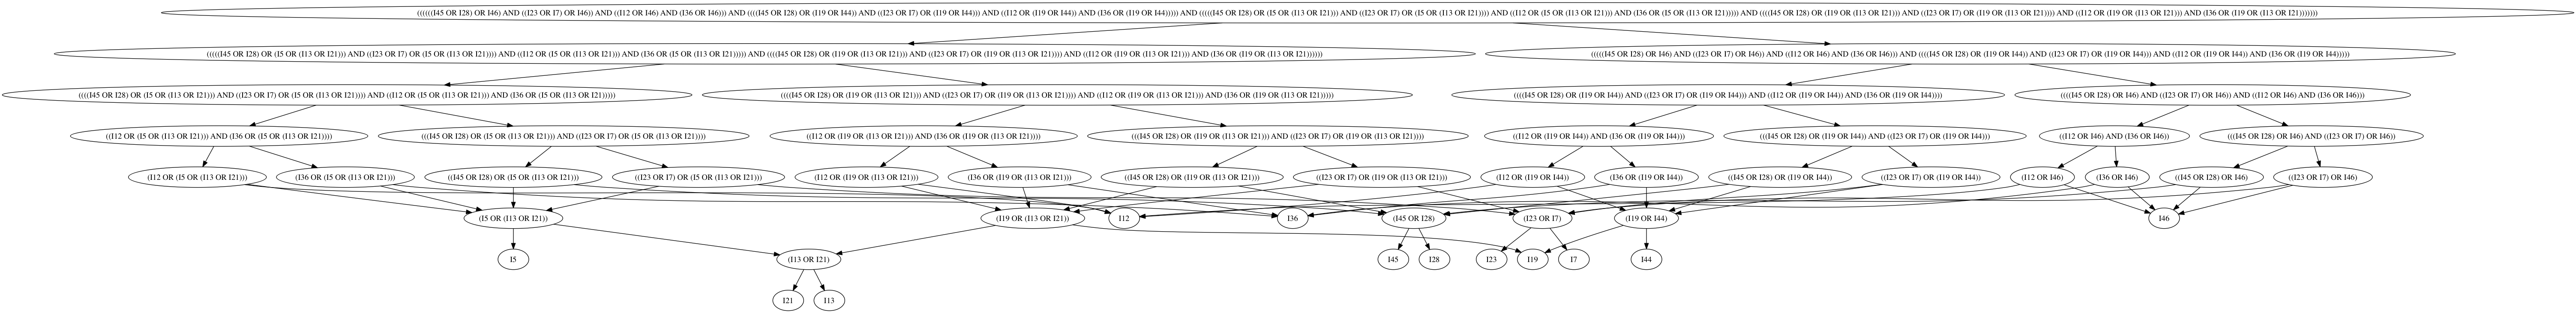

In [6]:
cnf = pbool.CNFFormula(f)

print "CF: " + str(cnf.formula)
cnf.formula.graph("foo.gv")
Image(filename='foo.gv.png') 




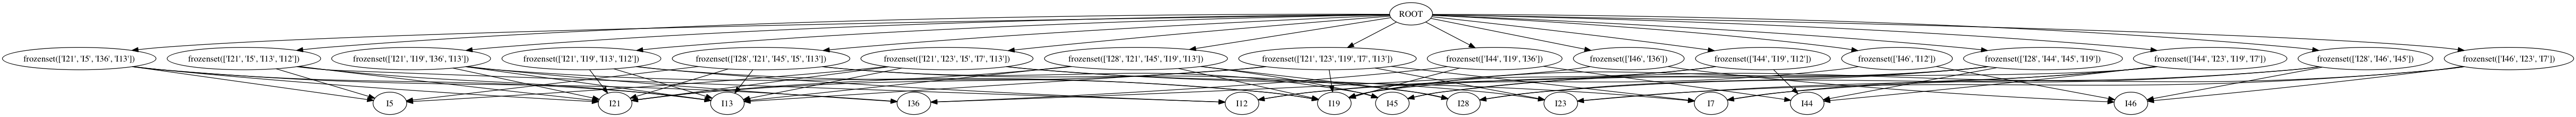

In [33]:
from graphviz import Digraph
g = Digraph(comment="foo", format="png")
for c in cnf.conjuncts():
    g.edges([("ROOT", str(c))])
    for l in c:
        g.edges([(str(c), str(l))])
g.render("foo.gv")
Image(filename='foo.gv.png')

Solve that CNF formula using the MHS ILP formulation

In [7]:
s = pilp.Solver(cnf)
soln = next(s.solutions())

print "SOLN: " + str(soln)



SOLN: [I46, I44, I13]


Now solve it using SAT.

In [8]:
s = psat.Solver(cnf)
soln = next(s.solutions())

print "SAt: " + str(soln)

SAt: ['I21', 'I5', 'I13', 'I12', 'I19', 'I36', 'I23', 'I7', 'I46', 'I28', 'I44', 'I45']


Now let's try to pretty print some of this shit.  A (probably unecessary, cut&pasted) helper function for reading our csv (next time, run the test right here).

In [9]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

def read_datafile(file_name):
    # the skiprows keyword is for heading, but I don't know if trailing lines
    # can be specified
    data = np.loadtxt(file_name, delimiter=', ', skiprows=1)
    return data

data = read_datafile('bench.csv')

sort the results by the size of the CNF formula

In [10]:
sdata = sorted(data, key=lambda x: x[3])

compare solution sizes between ILP and SAT

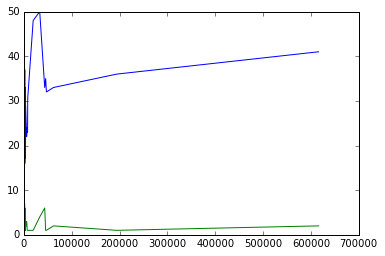

In [11]:
depths = map(lambda x: x[3], sdata)
vars = map(lambda x: [x[6], x[7]], sdata)
plt.plot(depths, vars)


what is the relationship between the number of CNF clauses and the time converting to CNF?  Pretty linear, it turns out:

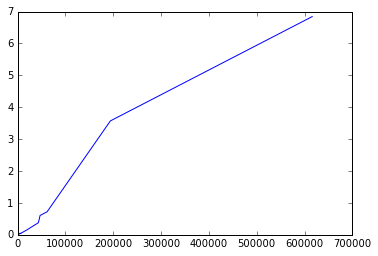

In [12]:
vars2 = map(lambda x: x[8], sdata)
plt.plot(depths, vars2)
plt.show()

The time to first solution using pycosat is AMAZINGLY fast and scaleable! the ILP solutions scales linearly with the input.

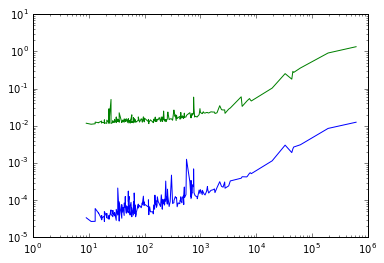

In [16]:
depths = map(lambda x: x[3], sdata)
vars = map(lambda x: [x[9], x[11]], sdata)
ax = plt.subplot()
ax.set_yscale("log")
ax.set_xscale("log")
ax.plot(depths, vars)

[9.0, 11.0, 13.0, 13.0, 13.0, 15.0, 15.0, 17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 21.0, 21.0, 21.0, 23.0, 23.0, 23.0, 23.0, 25.0, 25.0, 27.0, 27.0, 27.0, 29.0, 29.0, 29.0, 31.0, 31.0, 31.0, 31.0, 31.0, 31.0, 33.0, 33.0, 33.0, 35.0, 35.0, 35.0, 39.0, 39.0, 39.0, 39.0, 39.0, 39.0, 41.0, 41.0, 41.0, 43.0, 43.0, 45.0, 45.0, 45.0, 45.0, 47.0, 47.0, 49.0, 49.0, 51.0, 51.0, 51.0, 51.0, 51.0, 51.0, 53.0, 53.0, 53.0, 53.0, 55.0, 55.0, 55.0, 55.0, 57.0, 59.0, 59.0, 59.0, 59.0, 63.0, 63.0, 63.0, 63.0, 63.0, 63.0, 65.0, 65.0, 65.0, 67.0, 67.0, 67.0, 67.0, 69.0, 71.0, 71.0, 77.0, 77.0, 81.0, 87.0, 89.0, 91.0, 91.0, 95.0, 97.0, 99.0, 99.0, 99.0, 117.0, 117.0, 119.0, 119.0, 123.0, 127.0, 141.0, 143.0, 145.0, 147.0, 151.0, 153.0, 155.0, 157.0, 157.0, 159.0, 159.0, 163.0, 167.0, 169.0, 175.0, 183.0, 193.0, 199.0, 207.0, 207.0, 207.0, 215.0, 215.0, 219.0, 225.0, 229.0, 229.0, 231.0, 233.0, 239.0, 245.0, 247.0, 247.0, 255.0, 257.0, 261.0, 275.0, 287.0, 303.0, 317.0, 335.0,

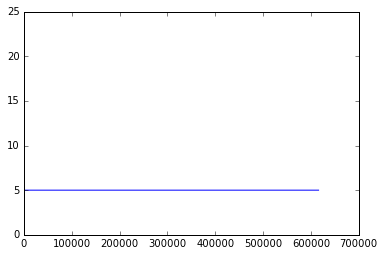

In [35]:
depths = map(lambda x: x[3], sdata)
vars = map(lambda x: 5 if x[10] == -1 else x[10], sdata)
#print str(depths)
plt.plot(depths, vars)